In [0]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [0]:
mytransform=transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(1.0,))])

train_data = torchvision.datasets.MNIST('./data',train=True,download=True,transform=mytransform)
data_loader_train = torch.utils.data.DataLoader(train_data,batch_size=200,shuffle=True,num_workers=0)

test_data = torchvision.datasets.MNIST('./data',train=False,download=True,transform=mytransform)
data_loader_test = torch.utils.data.DataLoader(test_data,batch_size=200,shuffle=True,num_workers=0)

In [10]:
# ref:https://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/
class MNISTNet3(nn.Module):
    def __init__(self):
        super(MNISTNet3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 33)
        self.fc2 = nn.Linear(33, 33)
        self.fc3 = nn.Linear(33, 33)
        self.fc4 = nn.Linear(33, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.softmax(x)
  
net3 = MNISTNet3()
print(net3)

learning_rate=0.01
# create a stochastic gradient descent optimizer
optimizer = torch.optim.SGD(net3.parameters(), lr=learning_rate, momentum=0.95, weight_decay = 0.001)
# create a loss function
criterion = nn.CrossEntropyLoss()

MNISTNet3(
  (fc1): Linear(in_features=784, out_features=33, bias=True)
  (fc2): Linear(in_features=33, out_features=33, bias=True)
  (fc3): Linear(in_features=33, out_features=33, bias=True)
  (fc4): Linear(in_features=33, out_features=10, bias=True)
)


In [11]:
epochs=30
# run the main training loop
train_loss = np.zeros(epochs)
train_acc = np.zeros(epochs)
test_loss = np.zeros(epochs)
test_acc = np.zeros(epochs)
#trining
for epoch in range(epochs):
    train_correct = 0
    for batch_idx, (data, target) in enumerate(data_loader_train):
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        data = data.view(-1, 28*28)
        optimizer.zero_grad()
        net_out = net3(data)
        loss = criterion(net_out, target)
        loss.backward()
        optimizer.step()
        train_loss[epoch] += loss.item()*data.size(0)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        train_correct += pred.eq(target.data).sum()
    train_acc[epoch]=train_correct.item() / len(data_loader_train.dataset)
    train_loss[epoch] = train_loss[epoch]/len(data_loader_train.dataset)
    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {}/{} ({:.0f}%)'.format(epoch+1, 
        (batch_idx+1) * len(data), len(data_loader_train.dataset),100. * batch_idx / len(data_loader_train),
        train_loss[epoch],train_correct, len(data_loader_train.dataset),
        100. *train_acc[epoch]))

    #testing
    correct = 0
    for data, target in data_loader_test:
        data = data.view(-1, 28 * 28)
        net_out = net3(data)
        # sum up batch loss
        test_loss[epoch] += criterion(net_out, target).item()*data.size(0)
        pred = net_out.data.max(1)[1]  # get the index of the max log-probability
        correct += pred.eq(target.data).sum()

    test_loss[epoch] = test_loss[epoch]/ len(data_loader_test.dataset)
    test_acc[epoch]=correct.item() / len(data_loader_test.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss[epoch], correct, len(data_loader_test.dataset),
            100. * test_acc[epoch]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  del sys.path[0]


Train Epoch: 1 [60000/60000 (100%)]	Loss: 2.299995	Accuracy: 9493/60000 (16%)

Test set: Average loss: 2.2945, Accuracy: 2339/10000 (23%)

Train Epoch: 2 [60000/60000 (100%)]	Loss: 2.183828	Accuracy: 17164/60000 (29%)

Test set: Average loss: 1.9516, Accuracy: 5909/10000 (59%)

Train Epoch: 3 [60000/60000 (100%)]	Loss: 1.800565	Accuracy: 40949/60000 (68%)

Test set: Average loss: 1.7037, Accuracy: 7727/10000 (77%)

Train Epoch: 4 [60000/60000 (100%)]	Loss: 1.676993	Accuracy: 47742/60000 (80%)

Test set: Average loss: 1.6541, Accuracy: 8141/10000 (81%)

Train Epoch: 5 [60000/60000 (100%)]	Loss: 1.650296	Accuracy: 49101/60000 (82%)

Test set: Average loss: 1.6347, Accuracy: 8327/10000 (83%)

Train Epoch: 6 [60000/60000 (100%)]	Loss: 1.610888	Accuracy: 51741/60000 (86%)

Test set: Average loss: 1.5807, Accuracy: 8887/10000 (89%)

Train Epoch: 7 [60000/60000 (100%)]	Loss: 1.575712	Accuracy: 53732/60000 (90%)

Test set: Average loss: 1.5644, Accuracy: 9058/10000 (91%)

Train Epoch: 8 [60000

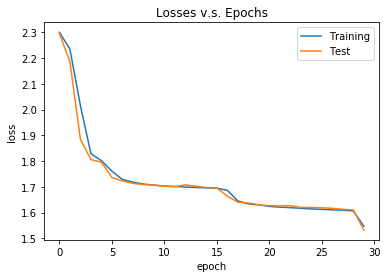

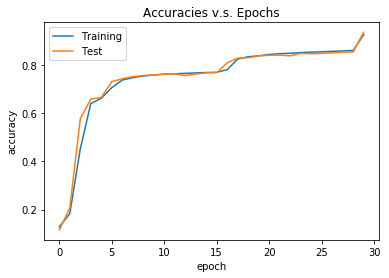

In [5]:
plt.plot(train_loss,markerfacecolor='blue',label="Training")
plt.plot(test_loss,markerfacecolor='red',label="Test")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Losses v.s. Epochs")
plt.legend()
plt.show()
plt.plot(train_acc,markerfacecolor='blue',label="Training")
plt.plot(test_acc,markerfacecolor='red',label="Test")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracies v.s. Epochs")
plt.legend()
plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression
#puling entire dataset 
#mytransform=transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize(mean=(0.5,), std=(1.0,))])
#train_data_logis = torchvision.datasets.MNIST('./data',train=True,download=True,transform=mytransform)
#data_loader_train_logis = torch.utils.data.DataLoader(train_data_logis,batch_size=60000,shuffle=True,num_workers=0)
#test_data_logis = torchvision.datasets.MNIST('./data',train=False,download=True,transform=mytransform)
#data_loader_test_logis = torch.utils.data.DataLoader(test_data_logis,batch_size=10000,shuffle=True,num_workers=0)

In [7]:
#fitting
for batch_idx, (image, label) in enumerate(data_loader_train):
    #print(str(batch_idx))
    image = image.view(-1, 28*28)
    with torch.no_grad():
      fit1=F.relu(net3.fc1(image))
      fit2=F.relu(net3.fc2(F.relu(net3.fc1(image))))
      fit3=F.relu(net3.fc3(F.relu(net3.fc2(F.relu(net3.fc1(image))))))
      
    #Input  
    image = image.view(-1, 28*28)
    logRegInput = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10, n_jobs=-1).fit(image, label)
    scoreAllTrain = logRegInput.score(image, label)
    print('Train Accuracy for input layer: '+'{:.4f}'.format(scoreAllTrain*100)+'%')  
      
    #layer 1
    logRegL1 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10, n_jobs=-1).fit(fit1, label)
    scoreL1Train = logRegL1.score(fit1, label)
    print('Train Accuracy for the first layer: '+'{:.4f}'.format(scoreL1Train*100)+'%')
    
    #layer 2
    logRegL2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10, n_jobs=-1).fit(fit2, label)
    scoreL2Train = logRegL2.score(fit2, label)
    print('Train Accuracy for the second layer: '+'{:.4f}'.format(scoreL2Train*100)+'%')
    
    #Layer 3
    logRegL3 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=10, n_jobs=-1).fit(fit3, label)
    scoreL3Train = logRegL3.score(fit3, label)
    print('Train Accuracy for the third layer: '+'{:.4f}'.format(scoreL3Train*100)+'%')  
      
    
    
    
for batch_idx, (image, label) in enumerate(data_loader_test):
    #print(str(batch_idx))
    image = image.view(-1, 28*28)
    with torch.no_grad():
      fit1=F.relu(net3.fc1(image))
      fit2=F.relu(net3.fc2(F.relu(net3.fc1(image))))
      fit3=F.relu(net3.fc3(F.relu(net3.fc2(F.relu(net3.fc1(image))))))
      
    #Input  
    scoreAllTest = logRegInput.score(image, label)
    print('Test Accuracy for input Layer: '+'{:.4f}'.format(scoreAllTest*100)+'%')
    
    #layer 1
    scoreL1Test = logRegL1.score(fit1, label)
    print('Test Accuracy for the first layer: '+'{:.4f}'.format(scoreL1Test*100)+'%')
    
    #layer 2
    scoreL2Test = logRegL2.score(fit2, label)
    print('Test Accuracy for the second layer: '+'{:.4f}'.format(scoreL2Test*100)+'%')
    
    #layer 3
    scoreL3Test = logRegL3.score(fit3, label)
    print('Test Accuracy for the third layer: '+'{:.4f}'.format(scoreL3Test*100)+'%')
    

Train Accuracy for input layer: 84.3283%
Train Accuracy for the first layer: 91.7617%
Train Accuracy for the second layer: 94.0133%
Train Accuracy for the third layer: 94.2983%
Test Accuracy for input Layer: 85.2100%
Test Accuracy for the first layer: 91.7700%
Test Accuracy for the second layer: 93.4800%
Test Accuracy for the third layer: 93.8400%
